In [15]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
G = nx.DiGraph()
df = pd.read_csv('2024.csv')

In [17]:


df['cost'] = (df["xG"] - df["xG.1"]) + (df['Home Score'] - df['Away Score'])

# week_1_df = df


In [18]:
week_1_df = df[df['Wk'].isin([ 2, 3,4])]

In [19]:
edgelist = list(zip(week_1_df['Home'], week_1_df['Away'], week_1_df['cost']))
print(edgelist)

[("Nott'ham Forest", 'Sheffield Utd', 1.9), ('Fulham', 'Brentford', -6.2), ('Liverpool', 'Bournemouth', 3.7), ('Wolves', 'Brighton', -3.1), ('Tottenham', 'Manchester Utd', 1.5999999999999999), ('Manchester City', 'Newcastle Utd', 1.7), ('Aston Villa', 'Everton', 6.3), ('West Ham', 'Chelsea', 1.3), ('Crystal Palace', 'Arsenal', -2.0), ('Chelsea', 'Luton Town', 4.800000000000001), ('Bournemouth', 'Tottenham', -3.4000000000000004), ('Everton', 'Wolves', -0.8), ('Brentford', 'Crystal Palace', 0.19999999999999996), ('Manchester Utd', "Nott'ham Forest", 2.5999999999999996), ('Arsenal', 'Fulham', 2.6), ('Brighton', 'West Ham', -3.5), ('Sheffield Utd', 'Manchester City', -3.8), ('Burnley', 'Aston Villa', -3.8), ('Newcastle Utd', 'Liverpool', 0.10000000000000009), ('Luton Town', 'West Ham', -0.6000000000000001), ('Sheffield Utd', 'Everton', -1.3), ('Chelsea', "Nott'ham Forest", 0.4999999999999998), ('Manchester City', 'Fulham', 4.800000000000001), ('Brentford', 'Bournemouth', 0.7999999999999998

In [20]:
mod_edgelist = []
for t in edgelist:
    if t[2] < 0:
        modified_tuple = (t[0], t[1], round(abs(t[2]), 2))
    else:
        modified_tuple = (t[1], t[0], round(t[2], 2))

    mod_edgelist.append(modified_tuple)

In [21]:
nodelist = pd.unique(df['Home'])
# Assuming week_1_df is a pandas DataFrame with columns 'Home', 'Away', and 'cost'
weightlist = dict(zip(zip(mod_edgelist[0], mod_edgelist[1]), mod_edgelist[2]))

In [22]:
for team1, team2, weight in mod_edgelist:
    G.add_edge(team1, team2, weight=weight)
edge_labels = nx.get_edge_attributes(G, 'weight')

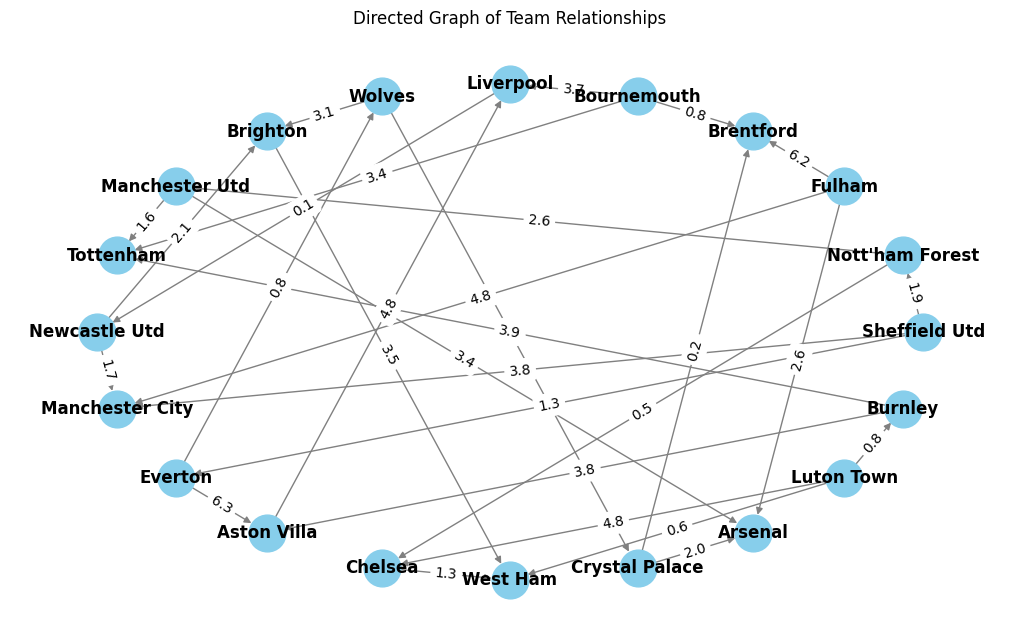

In [23]:
pos = nx.circular_layout(G)
plt.figure(figsize=(10, 6))

nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=12, font_color='black', font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Directed Graph of Team Relationships")
plt.show()

In [24]:
pagerank = nx.pagerank(G, alpha=0.85, personalization=None, max_iter=100000, tol=1e-03, nstart=None, weight='weight', dangling=None)

In [25]:
sorted_by_value = dict(sorted(pagerank.items(), key=lambda item: item[1], reverse=True))
rankings = {}
# Print in sorted order by value
for i, (key, value) in enumerate(sorted_by_value.items(), start=1):
    rankings[key] = i
    print(f"{i}. {key}: {value}")

1. West Ham: 0.128807464694689
2. Newcastle Utd: 0.09040298765726752
3. Brighton: 0.07971998193917827
4. Liverpool: 0.07902058671384324
5. Arsenal: 0.07717308036070339
6. Manchester City: 0.07582007891917308
7. Tottenham: 0.05525740764189701
8. Aston Villa: 0.05496045030434713
9. Manchester Utd: 0.044093140438628185
10. Chelsea: 0.04299077369729918
11. Brentford: 0.03714816951523152
12. Crystal Palace: 0.03196685796574614
13. Nott'ham Forest: 0.02897194181604145
14. Everton: 0.027255856214854754
15. Wolves: 0.026139513724562753
16. Burnley: 0.02612102541407
17. Sheffield Utd: 0.023537670745616905
18. Fulham: 0.023537670745616905
19. Bournemouth: 0.023537670745616905
20. Luton Town: 0.023537670745616905


## Compare Results

In [307]:
test_week = df[df['Wk'].isin([5])]
test_week

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Split Score,Home Score,Away Score,Winner,cost
39,5.0,Sat,2023-09-16,12:30,Wolves,0.6,1–3,2.5,Liverpool,31257.0,Molineux Stadium,Michael Oliver,"['1', '3']",1,3,Liverpool,-3.9
40,5.0,Sat,2023-09-16,15:00,Fulham,1.0,1–0,1.1,Luton Town,24467.0,Craven Cottage,Michael Salisbury,"['1', '0']",1,0,Fulham,0.9
41,5.0,Sat,2023-09-16,15:00,West Ham,0.9,1–3,3.6,Manchester City,62475.0,London Stadium,Andy Madley,"['1', '3']",1,3,Manchester City,-4.7
42,5.0,Sat,2023-09-16,15:00,Aston Villa,3.0,3–1,1.2,Crystal Palace,40809.0,Villa Park,Darren England,"['3', '1']",3,1,Aston Villa,3.8
43,5.0,Sat,2023-09-16,15:00,Manchester Utd,1.0,1–3,1.7,Brighton,73592.0,Old Trafford,Jarred Gillett,"['1', '3']",1,3,Brighton,-2.7
44,5.0,Sat,2023-09-16,15:00,Tottenham,2.1,2–1,0.7,Sheffield Utd,61706.0,Tottenham Hotspur Stadium,Peter Bankes,"['2', '1']",2,1,Tottenham,2.4
45,5.0,Sat,2023-09-16,17:30,Newcastle Utd,1.4,1–0,0.5,Brentford,51670.0,St James' Park,Craig Pawson,"['1', '0']",1,0,Newcastle Utd,1.9
46,5.0,Sun,2023-09-17,14:00,Bournemouth,1.0,0–0,1.8,Chelsea,10421.0,Vitality Stadium,David Coote,"['0', '0']",0,0,Draw,-0.8
47,5.0,Sun,2023-09-17,16:30,Everton,0.3,0–1,1.0,Arsenal,39217.0,Goodison Park,Simon Hooper,"['0', '1']",0,1,Arsenal,-1.7
48,5.0,Mon,2023-09-18,19:45,Nott'ham Forest,0.7,1–1,0.5,Burnley,28958.0,The City Ground,Robert Jones,"['1', '1']",1,1,Draw,0.2


In [ ]:
def project_winner(row):
    home_rank = rankings.get(row["Home"], float('inf'))
    away_rank = rankings.get(row["Away"], float('inf'))
    
    # Project a tie if the ranks are within 3 spots
    if abs(home_rank - away_rank) <= 2:
        return "Draw"
    elif home_rank < away_rank:
        return row["Home"]
    else:
        return row["Away"]

# Apply function to each row to create a new 'Projected Winner' column
test_week["Projected Winner"] = test_week.apply(project_winner, axis=1)

C:\Users\jacob.hyatt\AppData\Local\Temp\ipykernel_4276\1391370264.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_4_df["Projected Winner"] = week_4_df.apply(project_winner, axis=1)


In [ ]:
test_week

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Split Score,Home Score,Away Score,Winner,cost,Projected Winner
39,5.0,Sat,2023-09-16,12:30,Wolves,0.6,1–3,2.5,Liverpool,31257.0,Molineux Stadium,Michael Oliver,"['1', '3']",1,3,Liverpool,-3.9,Liverpool
40,5.0,Sat,2023-09-16,15:00,Fulham,1.0,1–0,1.1,Luton Town,24467.0,Craven Cottage,Michael Salisbury,"['1', '0']",1,0,Fulham,0.9,Draw
41,5.0,Sat,2023-09-16,15:00,West Ham,0.9,1–3,3.6,Manchester City,62475.0,London Stadium,Andy Madley,"['1', '3']",1,3,Manchester City,-4.7,West Ham
42,5.0,Sat,2023-09-16,15:00,Aston Villa,3.0,3–1,1.2,Crystal Palace,40809.0,Villa Park,Darren England,"['3', '1']",3,1,Aston Villa,3.8,Aston Villa
43,5.0,Sat,2023-09-16,15:00,Manchester Utd,1.0,1–3,1.7,Brighton,73592.0,Old Trafford,Jarred Gillett,"['1', '3']",1,3,Brighton,-2.7,Brighton
44,5.0,Sat,2023-09-16,15:00,Tottenham,2.1,2–1,0.7,Sheffield Utd,61706.0,Tottenham Hotspur Stadium,Peter Bankes,"['2', '1']",2,1,Tottenham,2.4,Tottenham
45,5.0,Sat,2023-09-16,17:30,Newcastle Utd,1.4,1–0,0.5,Brentford,51670.0,St James' Park,Craig Pawson,"['1', '0']",1,0,Newcastle Utd,1.9,Newcastle Utd
46,5.0,Sun,2023-09-17,14:00,Bournemouth,1.0,0–0,1.8,Chelsea,10421.0,Vitality Stadium,David Coote,"['0', '0']",0,0,Draw,-0.8,Chelsea
47,5.0,Sun,2023-09-17,16:30,Everton,0.3,0–1,1.0,Arsenal,39217.0,Goodison Park,Simon Hooper,"['0', '1']",0,1,Arsenal,-1.7,Arsenal
48,5.0,Mon,2023-09-18,19:45,Nott'ham Forest,0.7,1–1,0.5,Burnley,28958.0,The City Ground,Robert Jones,"['1', '1']",1,1,Draw,0.2,Nott'ham Forest


In [ ]:
correct_predictions = (test_week["Projected Winner"] == test_week["Winner"]).sum()
total_predictions = len(test_week)
accuracy = (correct_predictions / total_predictions) * 100

print(f"Accuracy of projected winners: {accuracy:.2f}%")

Accuracy of projected winners: 60.00%


## Back Testing

In [338]:
G = nx.DiGraph()
df = pd.read_csv('2024.csv')

In [339]:
df['cost'] = (df["xG"] - df["xG.1"]) + (df['Home Score'] - df['Away Score'])

In [340]:
week_1_df = df[df['Wk'].isin([1, 2, 3])]

In [341]:
edgelist = list(zip(week_1_df['Home'], week_1_df['Away'], week_1_df['cost']))

In [342]:
mod_edgelist = []
for t in edgelist:
    if t[2] < 0:
        modified_tuple = (t[0], t[1], round(abs(t[2]), 2))
    else:
        modified_tuple = (t[1], t[0], round(t[2], 2))

    mod_edgelist.append(modified_tuple)

In [343]:
nodelist = pd.unique(df['Home'])
# Assuming week_1_df is a pandas DataFrame with columns 'Home', 'Away', and 'cost'
weightlist = dict(zip(zip(mod_edgelist[0], mod_edgelist[1]), mod_edgelist[2]))

In [344]:
for team1, team2, weight in mod_edgelist:
    G.add_edge(team1, team2, weight=weight)

edge_labels = nx.get_edge_attributes(G, 'weight')

In [345]:
pagerank = nx.pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)

sorted_by_value = dict(sorted(pagerank.items(), key=lambda item: item[1], reverse=True))
rankings = {}
# Print in sorted order by value
for i, (key, value) in enumerate(sorted_by_value.items(), start=1):
    rankings[key] = i

In [ ]:
test_week = df[df['Wk'].isin([4])]
test_week["Projected Winner"] = test_week.apply(project_winner, axis=1)
correct_predictions = (test_week["Projected Winner"] == test_week["Winner"]).sum()
total_predictions = len(test_week)
accuracy = (correct_predictions / total_predictions) * 100
print(f"Accuracy of projected winners: {accuracy:.2f}%")


Accuracy of projected winners: 70.00%


C:\Users\jacob.hyatt\AppData\Local\Temp\ipykernel_4276\2523587560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_week["Projected Winner"] = test_week.apply(project_winner, axis=1)
